In [371]:
import time
start_time = time.time()
import numpy as np
import pandas as pd 
import os
os.getcwd()
os.chdir('C:\\Users\\yampo\\Downloads\\diamonds')


In [372]:
df=pd.read_csv( 'diamonds.csv')
df_coord = pd.read_csv('coords_diamonds.csv')

In [373]:
data = [
    {'Carat': 0.71, 'Cut': 'Good', 'Color': 'I', 'Clarity': 'VVS2', 'Depth': 63.1, 'Table': 58, 'x': 5.64, 'y': 5.71, 'z': 3.58, 'coordinates': '35.02636, -114.38351'},
    {'Carat': 0.83, 'Cut': 'Ideal', 'Color': 'G', 'Clarity': 'VS1', 'Depth': 62.1, 'Table': 55, 'x': 6.02, 'y': 6.05, 'z': 3.75, 'coordinates': '35.00350, -109.78961'},
    {'Carat': 0.5, 'Cut': 'Ideal', 'Color': 'E', 'Clarity': 'VS2', 'Depth': 61.5, 'Table': 55, 'x': 5.11, 'y': 5.16, 'z': 3.16, 'coordinates': '35.10544, -106.669673'},
    {'Carat': 0.39, 'Cut': 'Premium', 'Color': 'J', 'Clarity': 'VS1', 'Depth': 61.6, 'Table': 59, 'x': 4.67, 'y': 4.71, 'z': 2.89, 'coordinates': '34.94666, -104.64730'},
    {'Carat': 0.32, 'Cut': 'Premium', 'Color': 'G', 'Clarity': 'VS1', 'Depth': 62.1, 'Table': 56, 'x': 4.43, 'y': 4.4, 'z': 2.74, 'coordinates': '35.18864, -101.98602'},
    {'Carat': 0.9, 'Cut': 'Good', 'Color': 'F', 'Clarity': 'SI2', 'Depth': 63.3, 'Table': 57, 'x': 6.08, 'y': 6.14, 'z': 3.87, 'coordinates': '35.26611, -99.63874'},
    {'Carat': 0.51, 'Cut': 'Ideal', 'Color': 'D', 'Clarity': 'VS1', 'Depth': 60.9, 'Table': 57, 'x': 5.2, 'y': 5.17, 'z': 3.16, 'coordinates': '35.51572, -97.67080'},
    {'Carat': 1.12, 'Cut': 'Ideal', 'Color': 'G', 'Clarity': 'VVS2', 'Depth': 62.1, 'Table': 54.8, 'x': 6.64, 'y': 6.66, 'z': 4.13, 'coordinates': '36.163605, -95.75950'},
    {'Carat': 0.4, 'Cut': 'Ideal', 'Color': 'G', 'Clarity': 'VVS2', 'Depth': 62.4, 'Table': 56, 'x': 4.72, 'y': 4.74, 'z': 2.95, 'coordinates': '37.689186, -92.6473'},
    {'Carat': 0.36, 'Cut': 'Premium', 'Color': 'I', 'Clarity': 'VS2', 'Depth': 62.7, 'Table': 59, 'x': 4.54, 'y': 4.58, 'z': 2.86, 'coordinates': '38.66303, -90.21808'},
]

                                                                                                             
df_Krenk = pd.DataFrame(data)

In [374]:
display(df.sample(frac=1).head(3))
display(df_coord.sample(frac=1).head(3))
display(df_Krenk.sample(frac=1).head(3))

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
44632,44632,0.24,Very Good,D,VVS2,58.8,58.0,521,4.05,4.08,2.39
11080,11080,0.90,Very Good,E,VS2,60.4,59.0,4925,6.26,6.30,3.79
5873,5873,1.04,Very Good,J,SI2,63.2,58.6,3924,6.35,6.39,4.03


,Unnamed: 0,latitude,longitude
39712,39712,42.7044444,-73.911944
10594,10594,37.9886111,-84.477778
29485,29485,42.0852778,-83.682500


,Carat,Cut,Color,Clarity,Depth,Table,x,y,z,coordinates
1,0.83,Ideal,G,VS1,62.1,55.0,6.02,6.05,3.75,"35.00350, -109.78961"
2,0.50,Ideal,E,VS2,61.5,55.0,5.11,5.16,3.16,"35.10544, -106.669673"
8,0.40,Ideal,G,VVS2,62.4,56.0,4.72,4.74,2.95,"37.689186, -92.6473"


In [375]:
df.columns = df.columns.tolist()[:1] + [col.lower().strip() for col in df.columns[1:]]
df_coord.columns = df_coord.columns.tolist()[:1] + [col.lower().strip() for col in df_coord.columns[1:]]
df_Krenk.columns = [col.lower().strip() for col in df_Krenk.columns]

In [376]:
df = df.merge(right=df_coord, how ='left', on='Unnamed: 0')

In [377]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,latitude,longitude
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,39.8813889,-83.093056
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,33.4150000,-111.548889
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,40.1672222,-105.101389
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,37.3711111,-85.583056
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,48.5394444,-121.745000


In [378]:
latitude_col = []
longitude_col = []

for latitude, longitude in df_Krenk.coordinates.str.split(','):
    latitude_col.append(latitude)
    longitude_col.append(longitude)

In [379]:
df_Krenk['latitude'] = np.array(latitude_col, float)
df_Krenk['longitude'] = np.array(longitude_col, float)
df_Krenk.drop('coordinates', axis = 1, inplace=True)

In [380]:
df_Krenk

,carat,cut,color,clarity,depth,table,x,y,z,latitude,longitude
0,0.71,Good,I,VVS2,63.1,58.0,5.64,5.71,3.58,35.026360,-114.383510
1,0.83,Ideal,G,VS1,62.1,55.0,6.02,6.05,3.75,35.003500,-109.789610
2,0.50,Ideal,E,VS2,61.5,55.0,5.11,5.16,3.16,35.105440,-106.669673
3,0.39,Premium,J,VS1,61.6,59.0,4.67,4.71,2.89,34.946660,-104.647300
4,0.32,Premium,G,VS1,62.1,56.0,4.43,4.40,2.74,35.188640,-101.986020
5,0.90,Good,F,SI2,63.3,57.0,6.08,6.14,3.87,35.266110,-99.638740
6,0.51,Ideal,D,VS1,60.9,57.0,5.20,5.17,3.16,35.515720,-97.670800
7,1.12,Ideal,G,VVS2,62.1,54.8,6.64,6.66,4.13,36.163605,-95.759500
8,0.40,Ideal,G,VVS2,62.4,56.0,4.72,4.74,2.95,37.689186,-92.647300
9,0.36,Premium,I,VS2,62.7,59.0,4.54,4.58,2.86,38.663030,-90.218080


In [381]:
# Let's remove the index columns `Unnamed: 0`

df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [382]:
display(df.sample(frac=1).head())

,carat,cut,color,clarity,depth,table,price,x,y,z,latitude,longitude
40287,0.40,Ideal,H,VVS2,62.3,57.0,1125,4.73,4.71,2.94,41.5022222,-72.979167
53351,0.70,Ideal,F,VS2,61.6,57.0,2657,5.76,5.71,3.53,26.9616667,-82.352778
22793,1.74,Very Good,I,SI1,58.7,60.0,10823,7.84,7.90,4.62,40.1497222,-77.128611
11625,1.01,Good,D,VS1,56.8,61.0,5050,6.50,6.45,3.68,41.0352778,-111.937778
3015,0.73,Very Good,E,VS2,61.5,58.0,3307,5.71,5.80,3.54,42.6733333,-91.913333


In [383]:
df.dtypes

carat        float64
cut           object
color         object
clarity       object
depth        float64
table        float64
price          int64
x            float64
y            float64
z            float64
latitude      object
longitude    float64
dtype: object

In [384]:
for val in df.latitude.unique():
    try:
        np.float64(val)
    except:
        print(val)

33q.200088


In [385]:
df.latitude = df.latitude.str.replace('q', '').values.astype(float)

In [386]:
display(df.select_dtypes(include=[object]).isnull().sum())
categorcal_cols = df.select_dtypes(include=[object]).columns

cut        0
color      0
clarity    0
dtype: int64

In [ ]:
for col in categorcal_cols:
    print(col, ': ', df[col].unique())
   

cut :  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair' 'Very Goo!d' "P*'remium"
 'I#deal' '#Very Good' 'P?remium' "*'Ideal" '!Good' 'Pre!mium' 'Pr?emium'
 'Very Go#od' 'Ide&al' 'Ide!al' 'Id!eal' '&Premium' 'Go?od' 'G#ood'
 "Very *'Good" "Ide*'al" 'V&ery Good' '&Ideal' 'Very G#ood']
------------------------------------------------------------
color :  ['E' 'I' 'J' 'H' 'F' 'G' 'D' "*'E" '#F' '&G' '!H' '?J' '#D' '&I' '!I' '?G'
 '#H' '?H' '?E' "*'F" '!E' '&F' '#G' "*'I" '!F' '&E']
------------------------------------------------------------
clarity :  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF' 'S?I1' 'SI!1' '&VS2'
 '&SI2' "S*'I1" 'VS?1' "S*'I2" '#VS1' 'V&S2' 'V!S2' '!VS2' 'VS#2' "VVS*'2"
 "*'SI2" 'VV?S1' 'S&I1' "*'SI1" 'SI?1' 'VV#S1' 'V#S2' '#SI!1' 'S!I2']
------------------------------------------------------------


In [388]:
symbols_to_remove = ["?", "*'", "&", "#", "!"]

for col in categorcal_cols:
    for symb in symbols_to_remove:
        df[col] = df[col].str.replace(symb,'', regex=False)

In [389]:
for col in categorcal_cols:
    print(col, ': ', df[col].unique())
    

cut :  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color :  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity :  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [390]:
for col in categorcal_cols:
    display(df[col].value_counts())

cut
Ideal        21546
Premium      13788
Very Good    12082
Good          4904
Fair          1610
Name: count, dtype: int64

color
G    11288
E     9796
F     9541
H     8304
D     6774
I     5420
J     2807
Name: count, dtype: int64

clarity
SI1     13065
VS2     12256
SI2      9193
VS1      8167
VVS2     5063
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [391]:
df_numeric_cols = df.select_dtypes(include=[np.number])
df_numeric_cols.isnull().sum() 

carat           0
depth        2962
table           0
price           0
x            1090
y             585
z               0
latitude        0
longitude       0
dtype: int64

In [392]:
(df_numeric_cols == 0).sum() 

carat         0
depth         0
table         0
price         0
x             8
y             7
z            20
latitude      0
longitude     0
dtype: int64

In [393]:
df.replace(0, np.nan, inplace=True)

In [394]:
df_numeric_cols = df.select_dtypes(include=[np.number])
df_numeric_cols.isnull().sum() 

carat           0
depth        2962
table           0
price           0
x            1098
y             592
z              20
latitude        0
longitude       0
dtype: int64

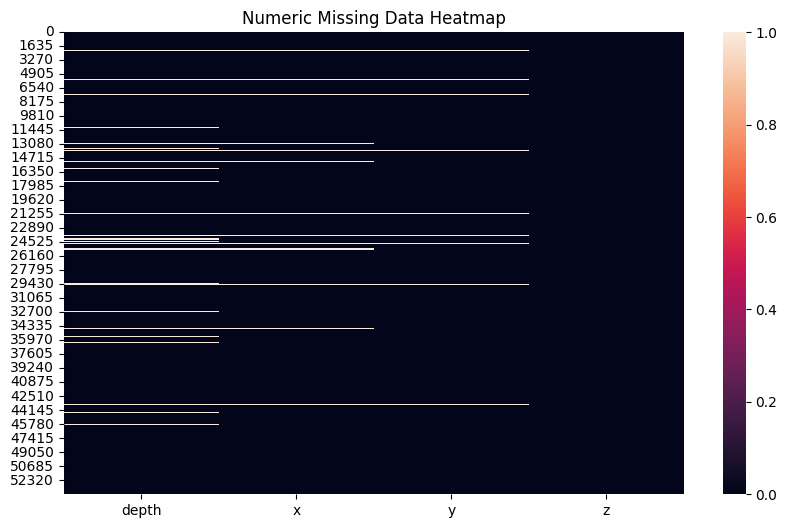

In [395]:
import seaborn as sns
import matplotlib.pyplot as plt


missing_data_cols = df_numeric_cols.columns[df_numeric_cols.isna().any()]
missing_data = df_numeric_cols[missing_data_cols].isna()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_data)
plt.title("Numeric Missing Data Heatmap")
plt.show()

In [396]:
100 * df_numeric_cols.isnull().sum() / len(df)

carat        0.000000
depth        5.492305
table        0.000000
price        0.000000
x            2.035973
y            1.097719
z            0.037085
latitude     0.000000
longitude    0.000000
dtype: float64

In [397]:
length = len(df)
df.dropna(inplace=True)
print(f'Porcentaje de datos despues de limpieza: {np.round(100*len(df)/length, 2)} %')

Porcentaje de datos despues de limpieza: 94.47 %


In [398]:
df_categorical_cols = df.select_dtypes(include=[object])

for col in df_categorical_cols.columns:
    print('--'*10 + f' {col} ' + '--'*15)
    display(df_categorical_cols[col].value_counts(normalize = True))

-------------------- cut ------------------------------


cut
Ideal        0.398210
Premium      0.256418
Very Good    0.224503
Good         0.091073
Fair         0.029795
Name: proportion, dtype: float64

-------------------- color ------------------------------


color
G    0.208487
E    0.181675
F    0.177200
H    0.154668
D    0.125559
I    0.100357
J    0.052053
Name: proportion, dtype: float64

-------------------- clarity ------------------------------


clarity
SI1     0.242836
VS2     0.226564
SI2     0.170605
VS1     0.151292
VVS2    0.094292
VVS1    0.067500
IF      0.033053
I1      0.013857
Name: proportion, dtype: float64

In [399]:
df['grouped_cut'] = df['cut'].replace(['Good', 'Fair'], 'GF')
df['grouped_color'] = df['color'].replace(['I', 'J'], 'IJ')
df['grouped_clarity'] = df['clarity'].replace(['IF', 'I1'], 'I')

In [400]:
for col in ['grouped_cut', 'grouped_color','grouped_clarity']:
    print('--'*10 + f' {col} ' + '--'*15)
    display(df[col].value_counts(normalize = True))

-------------------- grouped_cut ------------------------------


grouped_cut
Ideal        0.398210
Premium      0.256418
Very Good    0.224503
GF           0.120868
Name: proportion, dtype: float64

-------------------- grouped_color ------------------------------


grouped_color
G     0.208487
E     0.181675
F     0.177200
H     0.154668
IJ    0.152410
D     0.125559
Name: proportion, dtype: float64

-------------------- grouped_clarity ------------------------------


grouped_clarity
SI1     0.242836
VS2     0.226564
SI2     0.170605
VS1     0.151292
VVS2    0.094292
VVS1    0.067500
I       0.046911
Name: proportion, dtype: float64

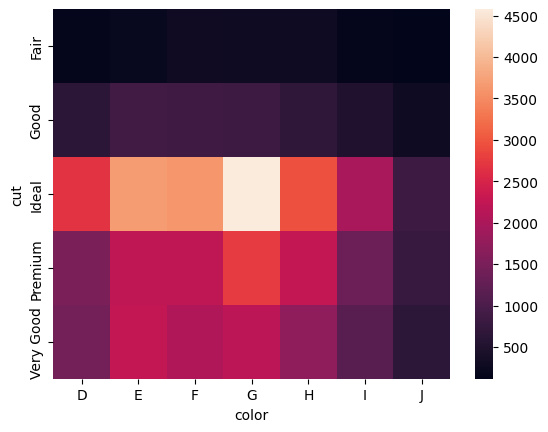

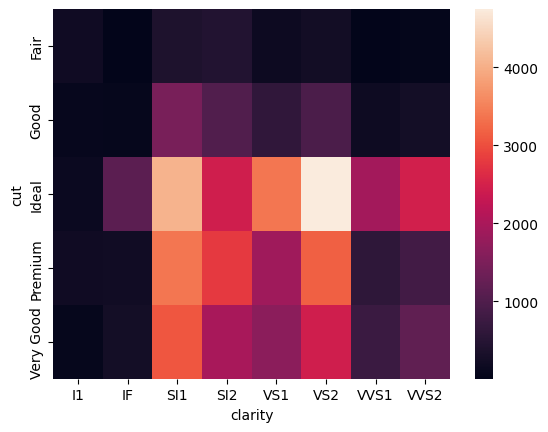

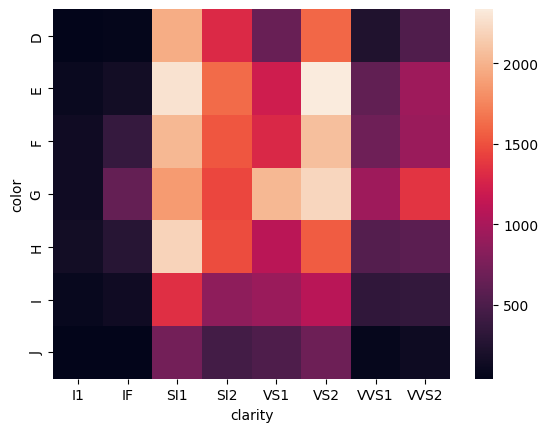

In [401]:
import itertools

cross_cols = list(itertools.combinations(df_categorical_cols.columns, 2))

for col1, col2 in cross_cols:
    sns.heatmap(pd.crosstab(df[col1], df[col2]))
    plt.show()

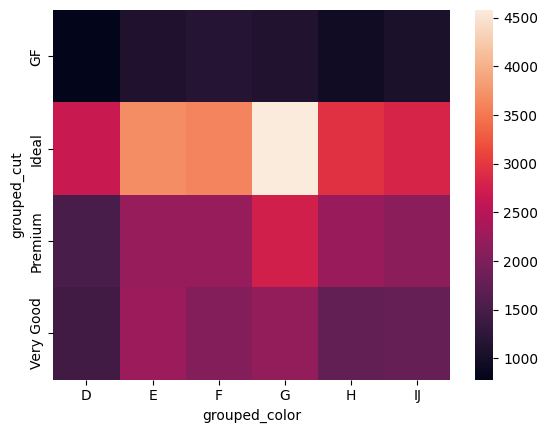

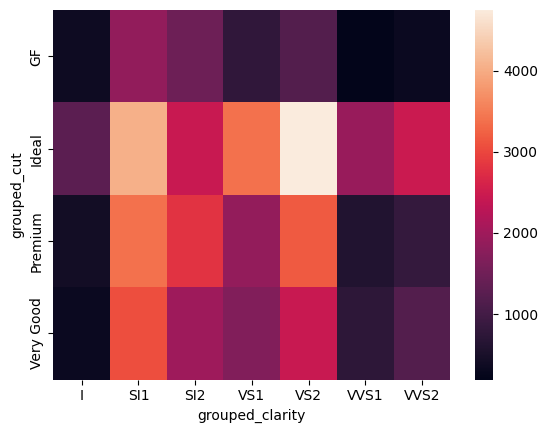

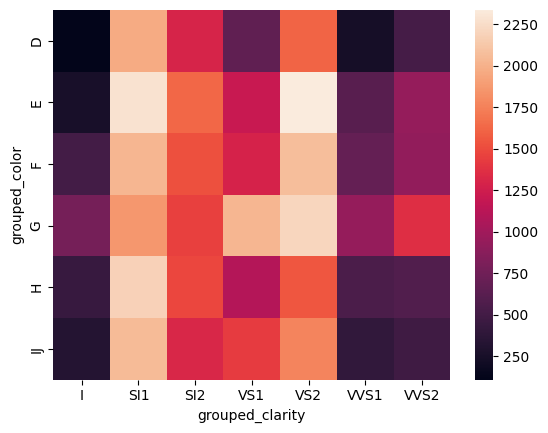

In [402]:
cross_cols = list(itertools.combinations(['grouped_cut', 'grouped_color',
       'grouped_clarity'], 2))

for col1, col2 in cross_cols:
    sns.heatmap(pd.crosstab(df[col1], df[col2]))
    plt.show()

In [403]:
df_numeric_cols = df.select_dtypes(include=[np.number])

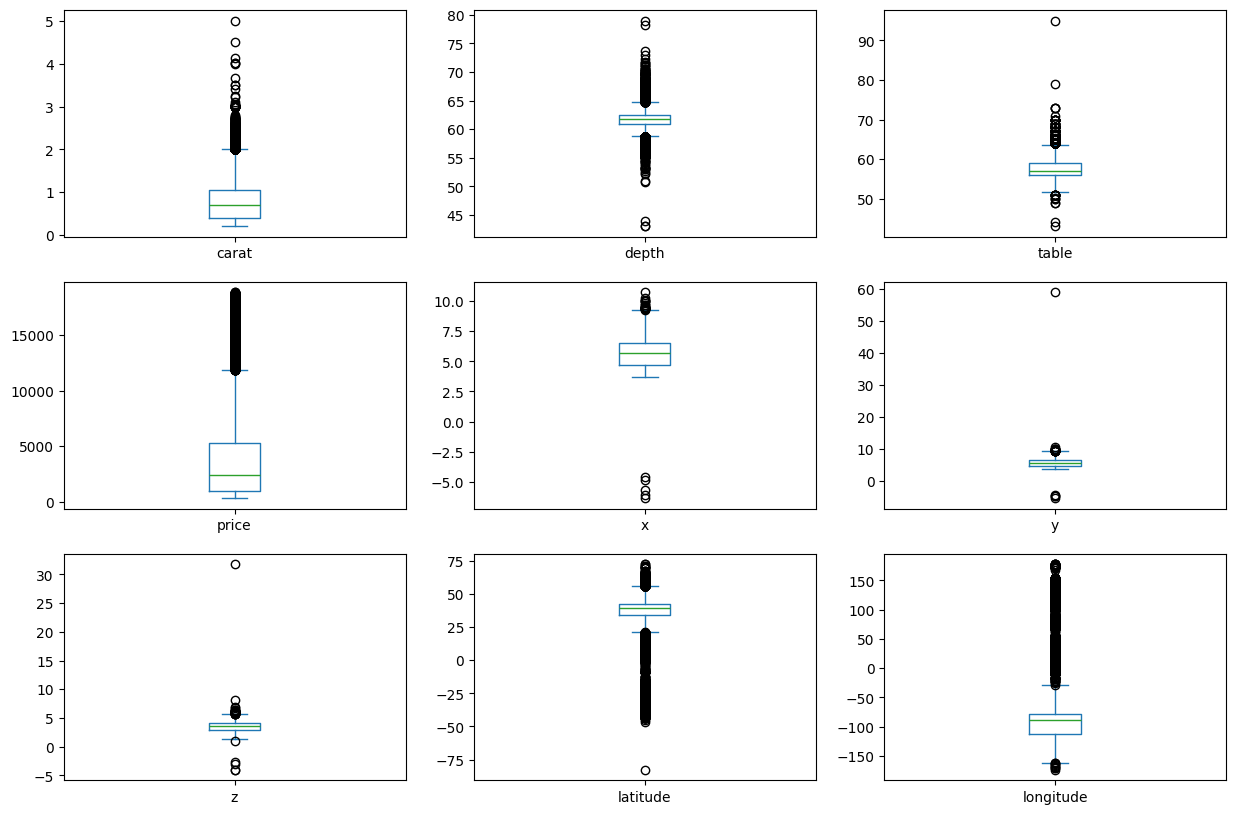

In [404]:
df_numeric_cols.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [405]:
def get_outliers_poss(col_name: str, x: pd.Series, y: pd.Series):
    q1 = x.quantile(.25)
    q2 = x.quantile(.5)
    q3 = x.quantile(.75)
    iqr = q3-q1
    uplim = float(q3+(1.5*iqr))
    lwlim = float(q1-(1.5*iqr))
    
    print( f'Are there outliers in stolen diamonds for column {col_name}?: {np.any((y > uplim) | (y < lwlim))}')
    return (x > uplim) | (x < lwlim)

numeric_cols = df_numeric_cols.columns.tolist()
numeric_cols.remove('price')
all_outliers_poss = False
for col in numeric_cols:
    all_outliers_poss = all_outliers_poss | get_outliers_poss(col, df[col], df_Krenk[col])
    

Are there outliers in stolen diamonds for column carat?: False
Are there outliers in stolen diamonds for column depth?: False
Are there outliers in stolen diamonds for column table?: False
Are there outliers in stolen diamonds for column x?: False
Are there outliers in stolen diamonds for column y?: False
Are there outliers in stolen diamonds for column z?: False
Are there outliers in stolen diamonds for column latitude?: False
Are there outliers in stolen diamonds for column longitude?: False


In [406]:
length = len(df)
df = df[~all_outliers_poss]
print(f'The remaining data after eliminating the missing ones represent: {np.round(100*len(df)/length, 2)} %')

The remaining data after eliminating the missing ones represent: 84.31 %


In [407]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,latitude,longitude,grouped_cut,grouped_color,grouped_clarity
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,39.881389,-83.093056,Ideal,E,SI2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,33.415000,-111.548889,Premium,E,SI1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,37.371111,-85.583056,Premium,IJ,VS2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,48.539444,-121.745000,GF,IJ,SI2
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.770556,-81.553333,Very Good,IJ,VVS2


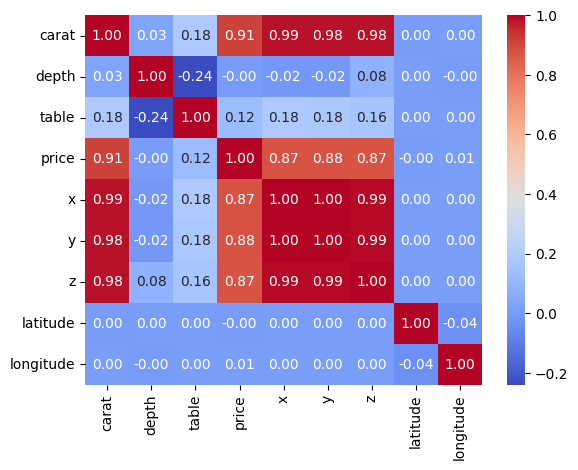

In [408]:
df_numeric_cols = df.select_dtypes(include=[np.number])

sns.heatmap(df_numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [409]:
h_corr_cols = ['x', 'y', 'z']

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df[h_corr_cols].values)
df_pca = pca.transform(df[h_corr_cols].values)
df_pca = pd.DataFrame(df_pca, columns=['Component 1', 'Component 2'])

In [410]:
df_pca.isnull().sum()

Component 1    0
Component 2    0
dtype: int64

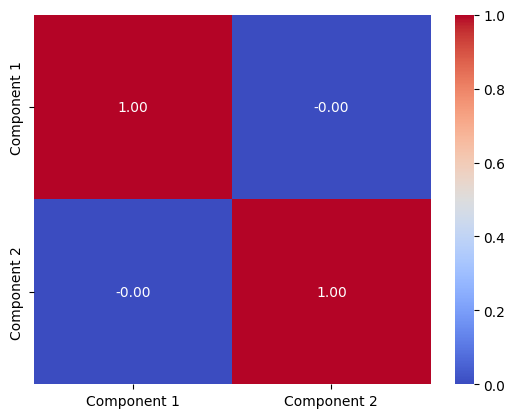

In [411]:
sns.heatmap(df_pca.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [412]:
df['xyz_pca_c1'] = df_pca['Component 1'].values
df['xyz_pca_c2'] = df_pca['Component 2'].values

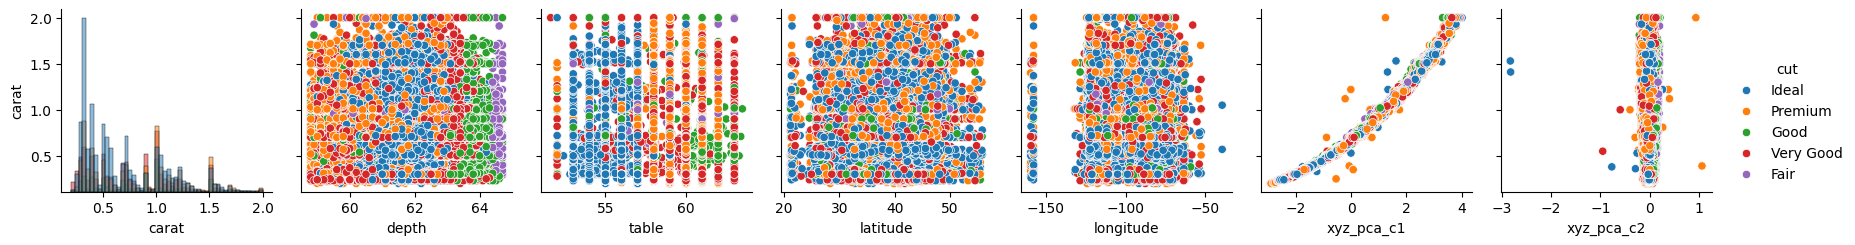

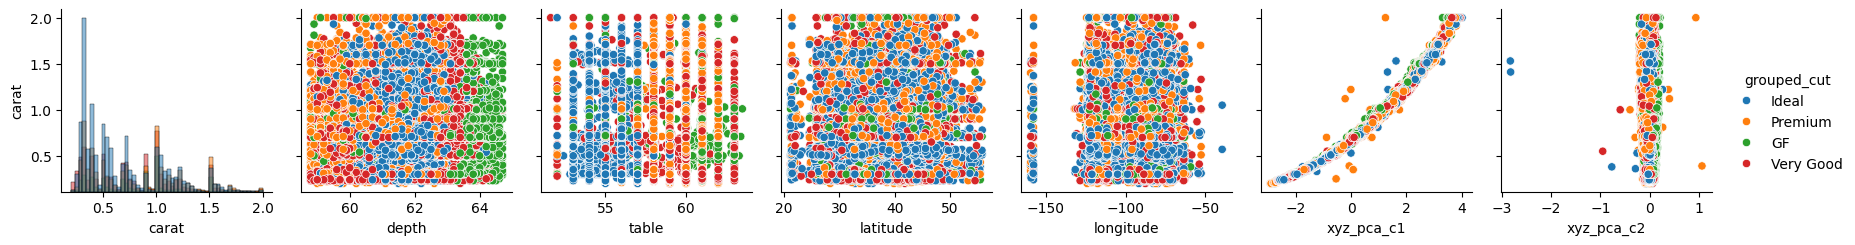

In [413]:
df_numeric_cols = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric_cols.columns.tolist()
numeric_cols.remove('price')
numeric_cols.remove('x')
numeric_cols.remove('y')
numeric_cols.remove('z')

x_cols = numeric_cols
y_cols = ['carat']
hue    = ['grouped_cut', 'grouped_color','grouped_clarity']

g = sns.PairGrid(data = df, x_vars=x_cols, y_vars=y_cols, hue = 'cut')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

g = sns.PairGrid(data = df, x_vars=x_cols, y_vars=y_cols, hue = 'grouped_cut')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

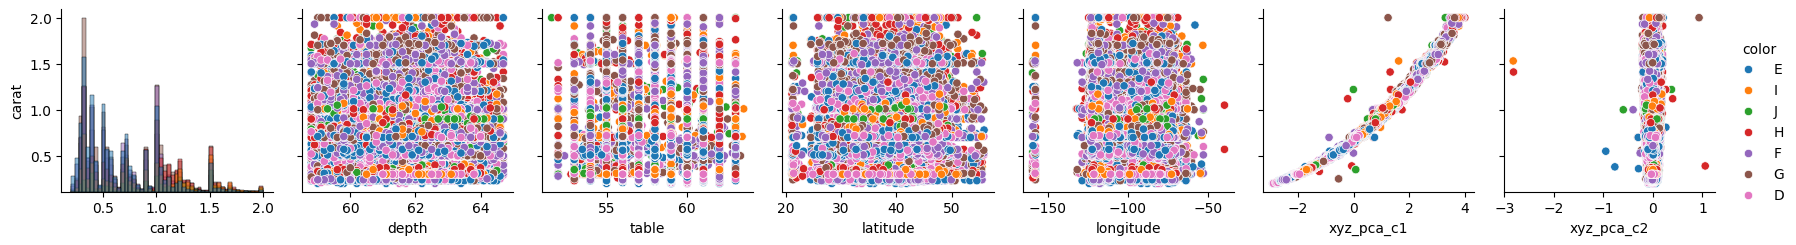

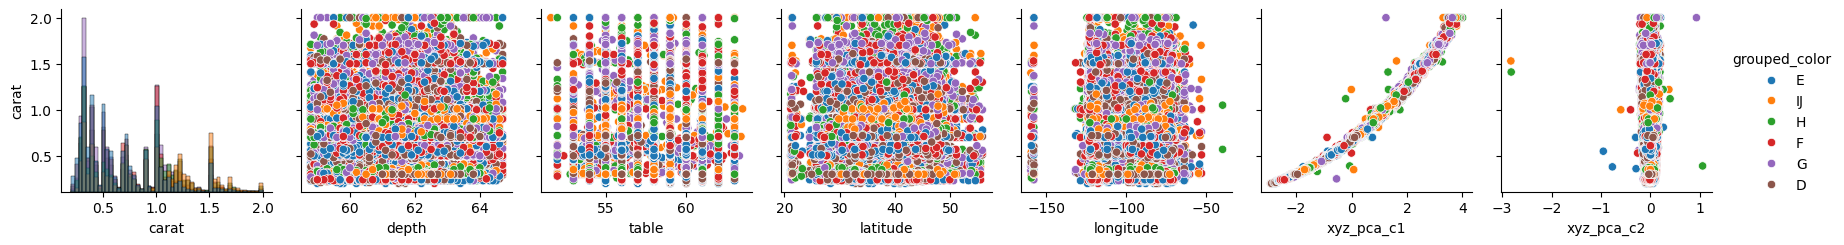

In [414]:
g = sns.PairGrid(data = df, x_vars=x_cols, y_vars=y_cols, hue = 'color')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

g = sns.PairGrid(data = df, x_vars=x_cols, y_vars=y_cols, hue = 'grouped_color')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

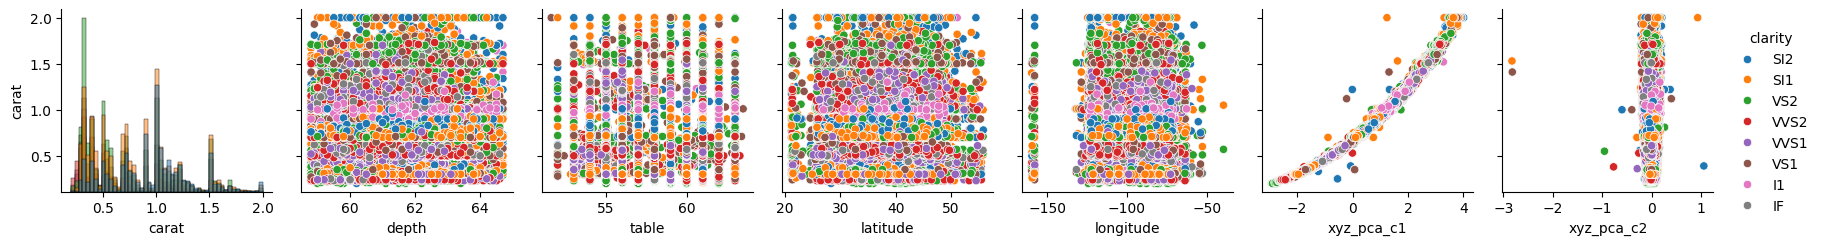

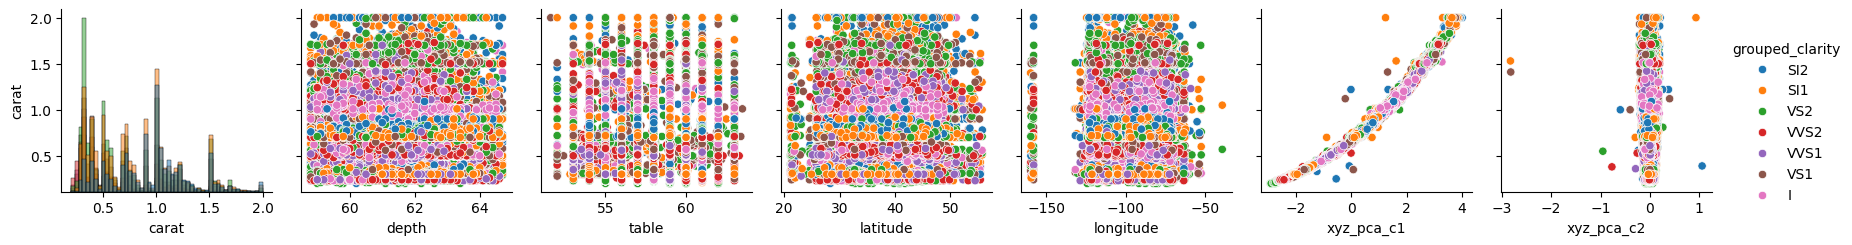

In [415]:
g = sns.PairGrid(data = df, x_vars=x_cols, y_vars=y_cols, hue = 'clarity')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

g = sns.PairGrid(data = df, x_vars=x_cols, y_vars=y_cols, hue = 'grouped_clarity')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

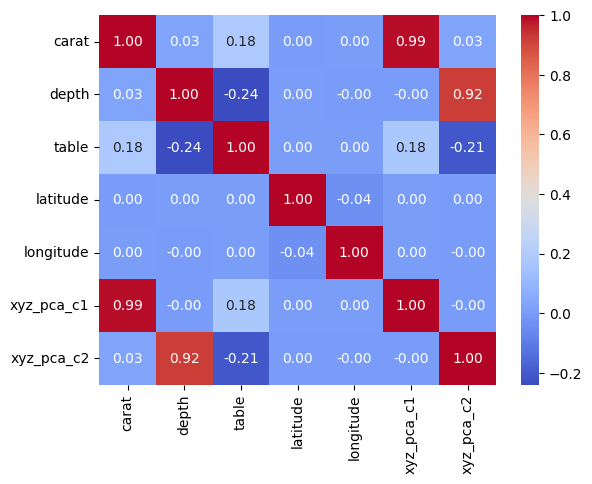

In [416]:
sns.heatmap(df_numeric_cols[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [417]:
Y  = df[['price']]
X1 = df.drop(['cut', 'color', 'clarity','price', 'x', 'y', 'z'], axis=1)
X2 = df.drop(['grouped_cut', 'grouped_color',
              'grouped_clarity','price', 'xyz_pca_c1', 'xyz_pca_c2'], axis=1)
X_all = df.drop(['price'], axis=1)

In [418]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

X1['grouped_cut'] = label_encoder.fit_transform(X1['grouped_cut'])
X1['grouped_color'] = label_encoder.fit_transform(X1['grouped_color'])
X1['grouped_clarity'] = label_encoder.fit_transform(X1['grouped_clarity'])
X1.head()

,carat,depth,table,latitude,longitude,grouped_cut,grouped_color,grouped_clarity,xyz_pca_c1,xyz_pca_c2
0,0.23,61.5,55.0,39.881389,-83.093056,1,1,2,-2.554437,-0.018582
1,0.21,59.8,61.0,33.415000,-111.548889,2,1,1,-2.731914,-0.070299
3,0.29,62.4,58.0,37.371111,-85.583056,2,5,4,-2.150393,0.023168
4,0.31,63.3,58.0,48.539444,-121.745000,0,5,2,-1.933849,0.059940
5,0.24,62.8,57.0,38.770556,-81.553333,3,5,6,-2.553849,0.035909


In [419]:
X2['cut'] = label_encoder.fit_transform(X2['cut'])
X2['color'] = label_encoder.fit_transform(X2['color'])
X2['clarity'] = label_encoder.fit_transform(X2['clarity'])
X2.head()

,carat,cut,color,clarity,depth,table,x,y,z,latitude,longitude
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,39.881389,-83.093056
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,33.415000,-111.548889
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,37.371111,-85.583056
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,48.539444,-121.745000
5,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48,38.770556,-81.553333


In [420]:
X_all['grouped_cut'] = label_encoder.fit_transform(X_all['grouped_cut'])
X_all['grouped_color'] = label_encoder.fit_transform(X_all['grouped_color'])
X_all['grouped_clarity'] = label_encoder.fit_transform(X_all['grouped_clarity'])
X_all['cut'] = label_encoder.fit_transform(X_all['cut'])
X_all['color'] = label_encoder.fit_transform(X_all['color'])
X_all['clarity'] = label_encoder.fit_transform(X_all['clarity'])
X_all.head()

,carat,cut,color,clarity,depth,table,x,y,z,latitude,longitude,grouped_cut,grouped_color,grouped_clarity,xyz_pca_c1,xyz_pca_c2
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,39.881389,-83.093056,1,1,2,-2.554437,-0.018582
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,33.415000,-111.548889,2,1,1,-2.731914,-0.070299
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,37.371111,-85.583056,2,5,4,-2.150393,0.023168
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,48.539444,-121.745000,0,5,2,-1.933849,0.059940
5,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48,38.770556,-81.553333,3,5,6,-2.553849,0.035909


In [421]:
X1 = X1.values
X2 = X2.values
X_all = X_all.values
Y     = Y.values

In [422]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y, test_size=0.3,random_state=142)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size=0.3,random_state=142)
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, Y, test_size=0.3,random_state=142)

In [423]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear diccionario para almacenar los resultados
results = {}

# Modelos de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X1_train, y1_train)
y1_pred_linear = linear_model.predict(X1_test)
linear_rmse = np.sqrt(mean_squared_error(y1_test, y1_pred_linear))
linear_r2 = r2_score(y1_test, y1_pred_linear)
results['Linear Regression (X1)'] = {'RMSE': linear_rmse, 'R^2': linear_r2}

linear_model = LinearRegression()
linear_model.fit(X2_train, y2_train)
y2_pred_linear = linear_model.predict(X2_test)
zz = np.sqrt(mean_squared_error(y2_test, y2_pred_linear))
linear_r2 = r2_score(y2_test, y2_pred_linear)
results['Linear Regression (X2)'] = {'RMSE': linear_rmse, 'R^2': linear_r2}

linear_model = LinearRegression()
linear_model.fit(X_all_train, y_all_train)
y_all_pred_linear = linear_model.predict(X_all_test)
linear_rmse = np.sqrt(mean_squared_error(y_all_test, y_all_pred_linear))
linear_r2 = r2_score(y_all_test, y_all_pred_linear)
results['Linear Regression (X_all)'] = {'RMSE': linear_rmse, 'R^2': linear_r2}

# Modelos de regresión polinomial
for degree in [2,3]: 
    poly_features = PolynomialFeatures(degree=degree)
    X1_poly = poly_features.fit_transform(X1_train)
    poly_model = LinearRegression()
    poly_model.fit(X1_poly, y1_train)
    X1_test_poly = poly_features.transform(X1_test)
    y1_pred_poly = poly_model.predict(X1_test_poly)
    poly_rmse = np.sqrt(mean_squared_error(y1_test, y1_pred_poly))
    poly_r2 = r2_score(y1_test, y1_pred_poly)
    results[f'Polynomial Regression (degree = {degree}) (X1)'] = {'RMSE': poly_rmse, 'R^2': poly_r2}

    poly_features = PolynomialFeatures(degree=degree)
    X2_poly = poly_features.fit_transform(X2_train)
    poly_model = LinearRegression()
    poly_model.fit(X2_poly, y2_train)
    X2_test_poly = poly_features.transform(X2_test)
    y2_pred_poly = poly_model.predict(X2_test_poly)
    poly_rmse = np.sqrt(mean_squared_error(y2_test, y2_pred_poly))
    poly_r2 = r2_score(y2_test, y2_pred_poly)
    results[f'Polynomial Regression (degree = {degree}) (X2)'] = {'RMSE': poly_rmse, 'R^2': poly_r2}

    poly_features = PolynomialFeatures(degree=degree)
    X_all_poly = poly_features.fit_transform(X_all_train)
    poly_model = LinearRegression()
    poly_model.fit(X_all_poly, y_all_train)
    X_all_test_poly = poly_features.transform(X_all_test)
    y_all_pred_poly = poly_model.predict(X_all_test_poly)
    poly_rmse = np.sqrt(mean_squared_error(y_all_test, y_all_pred_poly))
    poly_r2 = r2_score(y_all_test, y_all_pred_poly)
    results[f'Polynomial Regression (degree = {degree}) (X_all)'] = {'RMSE': poly_rmse, 'R^2': poly_r2}

# Árbol de decisión
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X1_train, y1_train)
y1_pred_tree = decision_tree.predict(X1_test)
tree_rmse = np.sqrt(mean_squared_error(y1_test, y1_pred_tree))
tree_r2 = r2_score(y1_test, y1_pred_tree)
results['Decision Tree (X1)'] = {'RMSE': tree_rmse, 'R^2': tree_r2}

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X2_train, y2_train)
y2_pred_tree = decision_tree.predict(X2_test)
tree_rmse = np.sqrt(mean_squared_error(y2_test, y2_pred_tree))
tree_r2 = r2_score(y2_test, y2_pred_tree)
results['Decision Tree (X2)'] = {'RMSE': tree_rmse, 'R^2': tree_r2}

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_all_train, y_all_train)
y_all_pred_tree = decision_tree.predict(X_all_test)
tree_rmse = np.sqrt(mean_squared_error(y_all_test, y_all_pred_tree))
tree_r2 = r2_score(y_all_test, y_all_pred_tree)
results['Decision Tree (X_all)'] = {'RMSE': tree_rmse, 'R^2': tree_r2}

# Random Forest
random_forest = RandomForestRegressor()
random_forest.fit(X1_train, y1_train.flatten())
y1_pred_rf = random_forest.predict(X1_test)
rf_rmse = np.sqrt(mean_squared_error(y1_test, y1_pred_rf))
rf_r2 = r2_score(y1_test, y1_pred_rf)
results['Random Forest (X1)'] = {'RMSE': rf_rmse, 'R^2': rf_r2}

random_forest = RandomForestRegressor()
random_forest.fit(X2_train, y2_train.flatten())
y2_pred_rf = random_forest.predict(X2_test)
rf_rmse = np.sqrt(mean_squared_error(y2_test, y2_pred_rf))
rf_r2 = r2_score(y2_test, y2_pred_rf)
results['Random Forest (X2)'] = {'RMSE': rf_rmse, 'R^2': rf_r2}

random_forest = RandomForestRegressor()
random_forest.fit(X_all_train, y_all_train.flatten())
y_all_pred_rf = random_forest.predict(X_all_test)
rf_rmse = np.sqrt(mean_squared_error(y_all_test, y_all_pred_rf))
rf_r2 = r2_score(y_all_test, y_all_pred_rf)
results['Random Forest (X_all)'] = {'RMSE': rf_rmse, 'R^2': rf_r2}

# Imprimir los resultados
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"R^2: {metrics['R^2']}")
    print()

Model: Linear Regression (X1)
RMSE: 1230.8167027166662
R^2: 0.8726480631497956

Model: Linear Regression (X2)
RMSE: 1230.8167027166662
R^2: 0.8762195963253059

Model: Linear Regression (X_all)
RMSE: 1185.9743134439786
R^2: 0.881758655910989

Model: Polynomial Regression (degree = 2) (X1)
RMSE: 980.3232145653966
R^2: 0.9192100450092802

Model: Polynomial Regression (degree = 2) (X2)
RMSE: 944.1959170529461
R^2: 0.9250549371375465

Model: Polynomial Regression (degree = 2) (X_all)
RMSE: 920.4360621794023
R^2: 0.9287793318716214

Model: Polynomial Regression (degree = 3) (X1)
RMSE: 1096.5493079918995
R^2: 0.8989176983348443

Model: Polynomial Regression (degree = 3) (X2)
RMSE: 1011.9395329964434
R^2: 0.9139149140762728

Model: Polynomial Regression (degree = 3) (X_all)
RMSE: 1198.0134650734635
R^2: 0.8793458704846251

Model: Decision Tree (X1)
RMSE: 802.8301372276933
R^2: 0.9458166159034431

Model: Decision Tree (X2)
RMSE: 656.4174512643483
R^2: 0.9637774492920458

Model: Decision Tree (X

In [424]:
cut_encoder = preprocessing.LabelEncoder() 
color_encoder = preprocessing.LabelEncoder() 
clarity_encoder = preprocessing.LabelEncoder() 

X = df.drop(['grouped_cut', 'grouped_color', 'grouped_clarity',
              'price', 'xyz_pca_c1', 'xyz_pca_c2'], axis=1)
Y  = df[['price']]

X['cut'] = cut_encoder.fit_transform(X['cut'])
X['color'] = color_encoder.fit_transform(X['color'])
X['clarity'] = clarity_encoder.fit_transform(X['clarity'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=142)

random_forest = RandomForestRegressor()
random_forest.fit(X_train.values, y_train.values.flatten())



RandomForestRegressor()

In [425]:
rf_rmse = np.sqrt(mean_squared_error(y_test.values, random_forest.predict(X_test.values) ))
rf_r2 = r2_score(y_test, random_forest.predict(X_test.values))

print(f"RMSE: {rf_rmse}")
print(f"R^2: {rf_r2}")

RMSE: 465.6066263858883
R^2: 0.9817754381085885


In [426]:
df_Krenk['cut'] = cut_encoder.transform(df_Krenk['cut'])
df_Krenk['color'] = color_encoder.transform(df_Krenk['color'])
df_Krenk['clarity'] = clarity_encoder.transform(df_Krenk['clarity'])
df_Krenk.head()

,carat,cut,color,clarity,depth,table,x,y,z,latitude,longitude
0,0.71,1,5,7,63.1,58.0,5.64,5.71,3.58,35.02636,-114.383510
1,0.83,2,3,4,62.1,55.0,6.02,6.05,3.75,35.00350,-109.789610
2,0.50,2,1,5,61.5,55.0,5.11,5.16,3.16,35.10544,-106.669673
3,0.39,3,6,4,61.6,59.0,4.67,4.71,2.89,34.94666,-104.647300
4,0.32,3,3,4,62.1,56.0,4.43,4.40,2.74,35.18864,-101.986020


In [427]:
estimated_price = random_forest.predict(df_Krenk.values)

In [428]:
df_Krenk['price'] = estimated_price

In [429]:
df_Krenk['cut'] = cut_encoder.inverse_transform(df_Krenk['cut'])
df_Krenk['color'] = color_encoder.inverse_transform(df_Krenk['color'])
df_Krenk['clarity'] = clarity_encoder.inverse_transform(df_Krenk['clarity'])
df_Krenk

,carat,cut,color,clarity,depth,table,x,y,z,latitude,longitude,price
0,0.71,Good,I,VVS2,63.1,58.0,5.64,5.71,3.58,35.026360,-114.383510,2379.55
1,0.83,Ideal,G,VS1,62.1,55.0,6.02,6.05,3.75,35.003500,-109.789610,4063.92
2,0.50,Ideal,E,VS2,61.5,55.0,5.11,5.16,3.16,35.105440,-106.669673,1624.68
3,0.39,Premium,J,VS1,61.6,59.0,4.67,4.71,2.89,34.946660,-104.647300,626.61
4,0.32,Premium,G,VS1,62.1,56.0,4.43,4.40,2.74,35.188640,-101.986020,804.03
5,0.90,Good,F,SI2,63.3,57.0,6.08,6.14,3.87,35.266110,-99.638740,3497.94
6,0.51,Ideal,D,VS1,60.9,57.0,5.20,5.17,3.16,35.515720,-97.670800,1863.68
7,1.12,Ideal,G,VVS2,62.1,54.8,6.64,6.66,4.13,36.163605,-95.759500,9079.86
8,0.40,Ideal,G,VVS2,62.4,56.0,4.72,4.74,2.95,37.689186,-92.647300,946.05
9,0.36,Premium,I,VS2,62.7,59.0,4.54,4.58,2.86,38.663030,-90.218080,542.87


In [430]:
print('El valor de los diamantes es : ', df_Krenk.price.sum())
end_time = time.time()
print("Tiempo de ejecución:", end_time - start_time, "segundos")

El valor de los diamantes es :  25429.190000000002
Tiempo de ejecución: 141.45805501937866 segundos
